In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from functions import loader, splt, fitter, stats
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from uncertainties import *
from uncertainties import unumpy as unp

savedir = "D03/"

In [8]:
all_data = loader.load_raw_data( "../Plans20221106ForUngaussianityscan_20221106_v2/**/" )
data = all_data
loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

48

In [9]:
loader.export( data, savedir + 'data.json' )

48  rows exported to  D03/data.json


In [10]:
for d in data:
    d['npskew'] = ( np.mean( d['chunks'] ) - np.median( d['chunks'] ) ) / np.std( d['chunks'], ddof = 1 )
    d['npskew_u'] = stats.compute_in_decades( d['chunks'], lambda c: ( np.mean( c ) - np.median( c ) ) / np.std( c, ddof = 1 ) )

filtered_data = data
len( filtered_data )

48

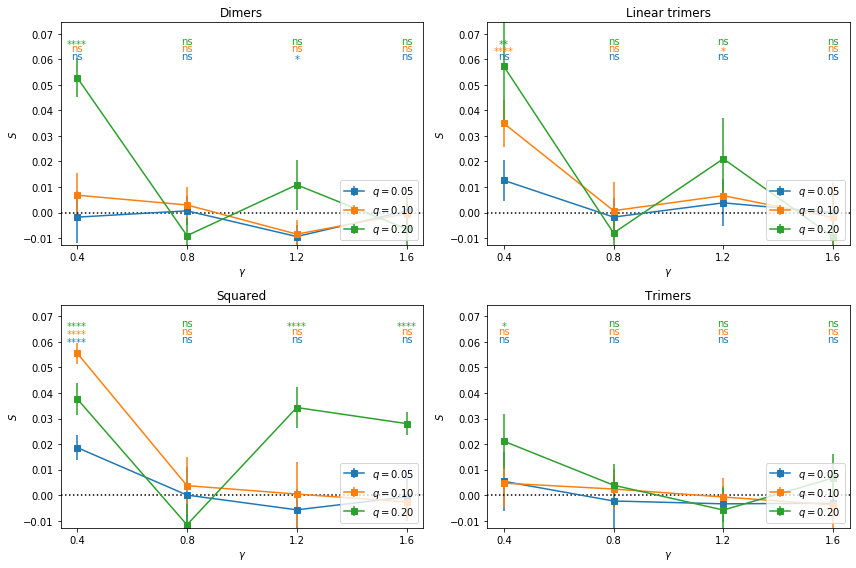

In [11]:
max = np.max( [ d['npskew'] for d in filtered_data ] )
min = np.min( [ d['npskew'] for d in filtered_data ] )

splt.oneitem_iterate_errorbar(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: [
        filtered_data[d]['npskew_u'],
    ],
    lambda it, l: [
        { 'label': fr"$q = {l:.2f}$", 'ls': '-', 'marker': 's'  }
    ],
    lambda it: (
        plt.title( fr"{it}" ),
        plt.ylim( np.min( [min * 1.1, min * 0.9] ), max * 1.3 ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$\gamma$" ),
        splt.hline( 0 ),
        plt.ylabel( fr"$S$" )
    ),
    pvals_ys = [ 0.06, 0.063, 0.066 ]
)

plt.tight_layout()
plt.savefig( savedir + "nonparametric_skewness_witherrors.pdf" )
plt.savefig( savedir + "nonparametric_skewness_witherrors.png" )

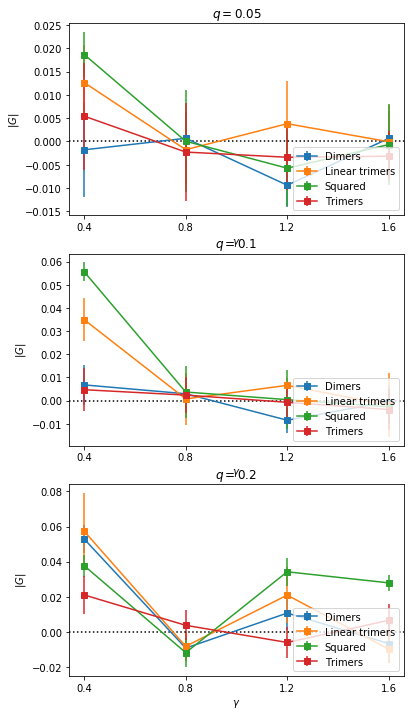

In [12]:
splt.oneitem_iterate_errorbar(
    len( filtered_data ),
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: [
        filtered_data[d]['npskew_u'],
    ],
    lambda it, l: [
        { 'label': fr"{l}", 'ls': '-', 'marker': 's'  }
    ],
    lambda it: (
        plt.title( fr"$q={it}$" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$\gamma$" ),
        splt.hline( 0 ),
        plt.ylabel( fr"$|G|$" )
    )
)

# plt.tight_layout()
# plt.savefig( savedir + "nonparametric_skewness_byshape.pdf" )